In [432]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
def kmeans(X, n_clusters, init=None, metric = "euclidean", Y = None):
    
    if init is None:
        rng = np.random.RandomState(np.random.randint(0,9999))
        i = rng.permutation(X.shape[0])[:n_clusters]
        
        centers = X[i]
    else:
        centers = init
        assert(len(centers) == n_clusters, "Initialization length != n_clusters")
    itr = 0
    labels = [0 for i in range(len(X))]
    SSE = 999999
    while True:
        itr += 1
        # 2a. Assign labels based on closest center
        for c in range(len(centers)):
            if centers[c].any() == None:
                break
        labels = pairwise_distances_argmin(X, centers, metric=metric)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        new_SSE = calcSSE(X, new_centers, labels)
        # 2c. Check for convergence
        
#         if np.all(centers == new_centers):
#             return centers, labels, itr
#             break
            
#         if new_SSE >= SSE:
#             return centers, labels, itr
#             break
            
        if itr > 100:
            return centers, labels, itr
            break
            
        SSE = new_SSE
        centers = new_centers
    
    return centers, labels, itr


<ipython-input-432-6ddf1cf3868b>:18: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(centers) == n_clusters, "Initialization length != n_clusters")


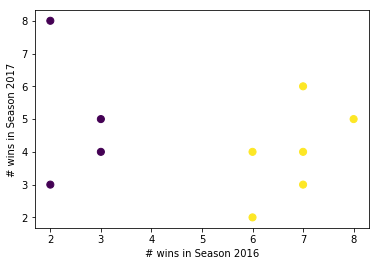

In [119]:
# 1 (1)
X = pd.read_csv("data5.csv",header=None)
X = np.array(X)
centers, labels, itr = kmeans(X, 2, init=[[4,6],[5,4]])
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel("# wins in Season 2016")
plt.ylabel("# wins in Season 2017")
plt.show()

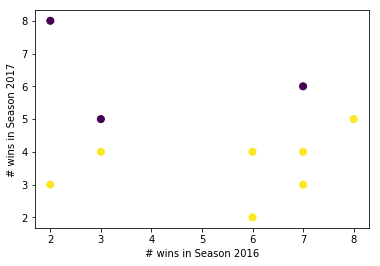

In [120]:
# 1 (2)
X = pd.read_csv("data5.csv",header=None)
X = np.array(X)
centers, labels, itr = kmeans(X, 2, init=[[4,6],[5,4]], metric="manhattan")
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel("# wins in Season 2016")
plt.ylabel("# wins in Season 2017")
plt.show()

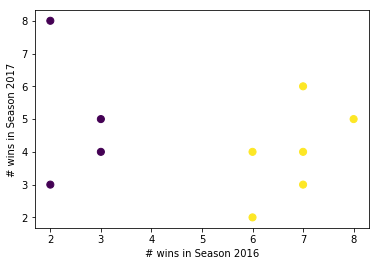

In [121]:
# 1 (3)
X = pd.read_csv("data5.csv",header=None)
X = np.array(X)
centers, labels, itr = kmeans(X, 2, init=[[3,3],[8,3]], metric="manhattan")
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel("# wins in Season 2016")
plt.ylabel("# wins in Season 2017")
plt.show()

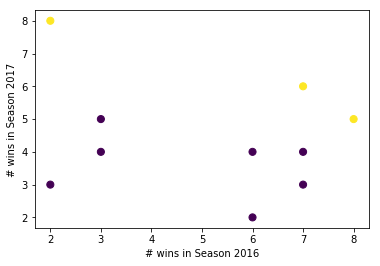

In [122]:
# 1 (4)
X = pd.read_csv("data5.csv",header=None)
X = np.array(X)
centers, labels, itr = kmeans(X, 2, init=[[3,2],[4,8]], metric="manhattan")
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel("# wins in Season 2016")
plt.ylabel("# wins in Season 2017")
plt.show()

In [175]:
def calcSSE(X, centers, labels):
    sse = 0
    for i, x in enumerate(X):
        sse += np.linalg.norm(x-centers[labels[i]])
    return sse


In [433]:
# 2 Q1
def euclidean(a,b):
    return np.linalg.norm(a-b)
def cosine(a,b):
    if a.any() == None or b.any() == None:
        return 99999
    return 1 - np.dot(a,b) / (np.linalg.norm(a)*np.linalg.norm(b))

def jaccard(a,b):
    if a.any() == None or b.any() == None:
        return float("inf")
    dist_min = 0
    dist_max = 0
    for i in range(len(a)):
        dist_min += min(a[i],b[i])
        dist_max += max(a[i],b[i])
    return 1-dist_min/dist_max

X, y = load_iris(return_X_y=True)

euclidean_SSE = []
cosine_SSE = []
jaccard_SSE = []
euclidean_itr = []
cosine_itr = []
jaccard_itr = []
for k in range(1,15):
    centers, labels_euc, itr = kmeans(X, k, metric=euclidean)
    euclidean_SSE.append(calcSSE(X, centers, labels_euc))
    euclidean_itr.append(itr)
    print(calcSSE(X, centers, labels_euc), itr)
    
    centers, labels_cos, itr = kmeans(X, k, metric=cosine)
    cosine_SSE.append(calcSSE(X, centers, labels_cos))
    cosine_itr.append(itr)
    print(calcSSE(X, centers, labels_cos), itr)
    
    centers, labels_jac, itr = kmeans(X, k, metric=jaccard)
    jaccard_SSE.append(calcSSE(X, centers, labels_jac))
    jaccard_itr.append(itr)
    print(calcSSE(X, centers, labels_jac), itr)

print("Euclidean Distance: Best k = {}, SSE = {}, iterations taken = {}".format(np.argmin(euclidean_SSE), 
                                                           euclidean_SSE[np.argmin(euclidean_SSE)], 
                                                            euclidean_itr[np.argmin(euclidean_SSE)]))
print("Cosine Distance: Best k = {}, SSE = {}, iterations taken = {}".format(np.argmin(cosine_SSE), 
                                                           cosine_SSE[np.argmin(cosine_SSE)], 
                                                            cosine_itr[np.argmin(cosine_SSE)]))
print("Jaccard Distance: Best k = {}, SSE = {}, iterations taken = {}".format(np.argmin(jaccard_SSE), 
                                                           jaccard_SSE[np.argmin(jaccard_SSE)], 
                                                                jaccard_itr[np.argmin(jaccard_SSE)]))

291.4551238555538 101
291.4551238555538 101
291.4551238555538 101
128.4041952367294 101
128.14222239066092 101
128.14222239066092 101
122.27888347513846 101
101.57278954029861 101
98.12547406059446 101
83.72906657028328 101
100.45923993094526 101
84.16514081425846 101
76.62135001208124 101
97.35369778778404 101
77.52246130578098 101
73.3932128656307 101
94.74218921367081 101
70.58159915249911 101
66.97348620851393 101
96.52750683485164 101
70.73522831847075 101
66.14763640351741 101
92.11805677699108 101
69.18011824199272 101
70.2899594331975 101
89.9459261709224 101
68.05313065061219 101
57.769175275185134 101
91.19610439674553 101
57.70993691368635 101
58.339427216936514 101
88.31146029010473 101
68.16467191428471 101
55.16032515606959 101
89.42990590909808 101
60.363912352569095 101
54.46390250076899 101
86.326923948594 101
57.19239973320148 101
52.44263423134245 101
87.91300091375004 101
59.72555937192869 101
Euclidean Distance: Best k = 13, SSE = 52.44263423134245, iterations take

In [405]:
euclidean_y = np.array([-1 for i in range(len(y))])
for i in range(len(np.unique(labels_euc))):
    euclidean_y[labels_euc==i] = [np.argmax(np.bincount(y[labels_euc==i]))]
    
cosine_y = np.array([-1 for i in range(len(y))])
for i in range(len(np.unique(labels_cos))):
    cosine_y[labels_cos==i] = [np.argmax(np.bincount(y[labels_cos==i]))]
    
jaccard_y = np.array([-1 for i in range(len(y))])
for i in range(len(np.unique(labels_jac))):
    jaccard_y[labels_jac==i] = [np.argmax(np.bincount(y[labels_jac==i]))]
    
print("Euclidean accuracy: ", accuracy_score(y, euclidean_y))
print("Cosine accuracy: ", accuracy_score(y, cosine_y))
print("Jaccard accuracy: ", accuracy_score(y, jaccard_y))

Euclidean accuracy:  0.9733333333333334
Cosine accuracy:  0.9666666666666667
Jaccard accuracy:  0.9266666666666666


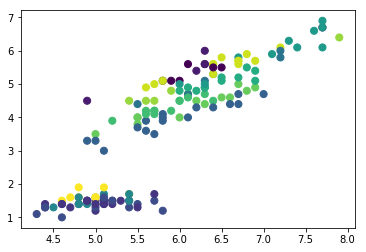

In [412]:
plt.scatter(X[:, 0], X[:, 2], c=labels_cos,
            s=50, cmap='viridis')
plt.show()

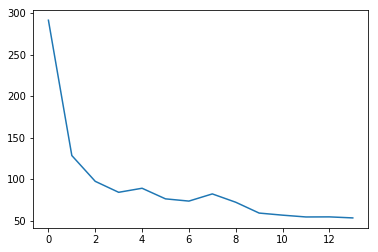

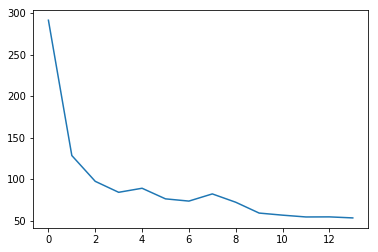

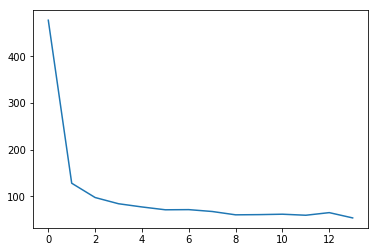

In [348]:
import matplotlib.pyplot as plt
xs = np.arange(len(euclidean_SSE))
plt.plot(euclidean_SSE)
plt.show()
xs = np.arange(len(cosine_SSE))
plt.plot(euclidean_SSE)
plt.show()
xs = np.arange(len(jaccard_SSE))
plt.plot(jaccard_SSE)
plt.show()